***Importing Libraries***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
from scipy.stats import stats
warnings.filterwarnings('ignore')

In [3]:
!pip install scipy


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


****Loading the dataset****

In [4]:
conn = sqlite3.connect('inventory.db')
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,7979400,2.096188e+08,142049.0,5101919.51,672819.31,260999.20,68601.68,-2.045169e+08,-4008.626912,0.017802,0.024339
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,9022090,2.092223e+08,160247.0,4819073.49,561512.37,294438.66,144929.24,-2.044032e+08,-4241.545476,0.017762,0.023033
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,10307385,1.880067e+08,187140.0,4538120.60,461140.15,343854.07,123780.22,-1.834686e+08,-4042.831779,0.018156,0.024138
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,11092510,1.793659e+08,200412.0,4475972.88,420050.01,368242.80,257032.07,-1.748899e+08,-3907.305038,0.018067,0.024954
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,7595995,1.662763e+08,135838.0,4223107.62,545778.28,249587.83,257032.07,-1.620532e+08,-3837.297969,0.017883,0.025398


## Exploratory Data Analysis

* Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

* In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [5]:
# summmary statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,12442.0,9.662296e+03,1.746766e+04,2.000000e+00,3960.000000,4425.000000,9552.000000,1.733570e+05
Brand,12442.0,1.886375e+04,1.250800e+04,5.800000e+01,6946.000000,19703.000000,25837.750000,9.063100e+04
PurchasePrice,12442.0,2.491144e+01,1.037670e+02,3.600000e-01,7.140000,10.800000,20.400000,5.681810e+03
ActualPrice,12442.0,3.663241e+01,1.414878e+02,4.900000e-01,10.990000,16.990000,29.990000,7.499990e+03
Volume,12442.0,8.387319e+02,6.436241e+02,5.000000e+01,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,12442.0,1.540575e+05,5.716457e+05,1.000000e+00,1540.000000,11220.000000,88495.000000,1.857130e+07
TotalPurchaseDollars,12442.0,1.481039e+06,6.371953e+06,3.198000e+01,22073.135000,162592.100000,948248.125000,2.096188e+08
TotalSalesQuantity,12442.0,2.890301e+03,1.049714e+04,0.000000e+00,32.000000,238.000000,1738.750000,3.349390e+05
TotalSalesDollars,12442.0,4.010504e+04,1.638235e+05,0.000000e+00,782.130000,5116.530000,26606.637500,5.101920e+06
TotalSalesPrice,12442.0,1.766683e+04,4.292533e+04,0.000000e+00,321.877500,2757.610000,14813.055000,6.728193e+05


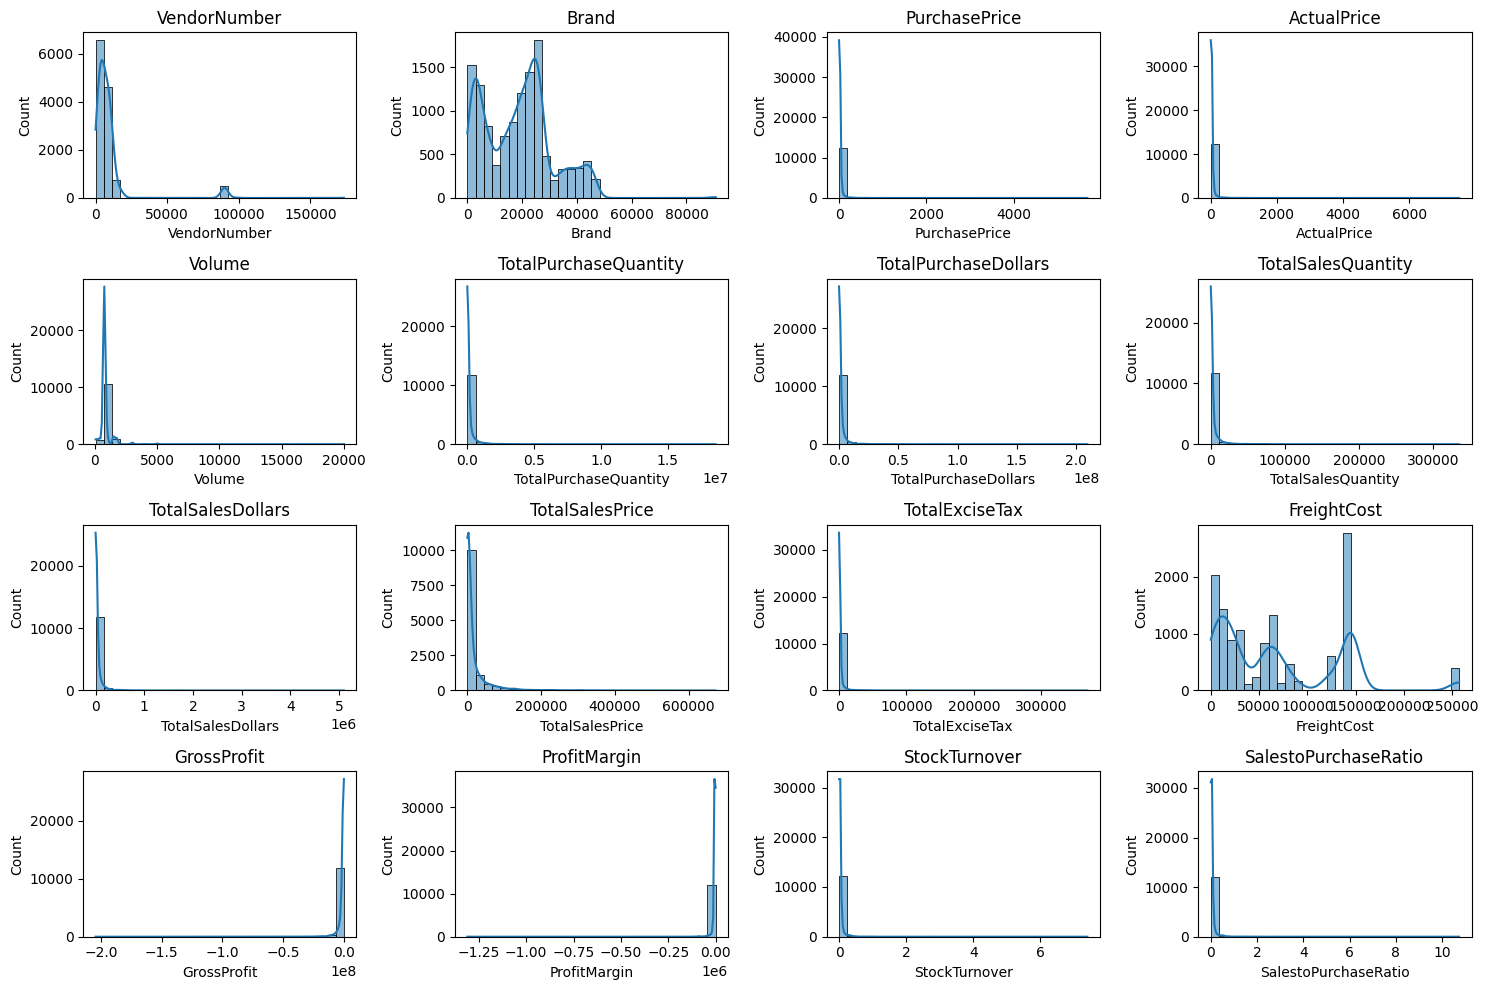

In [6]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

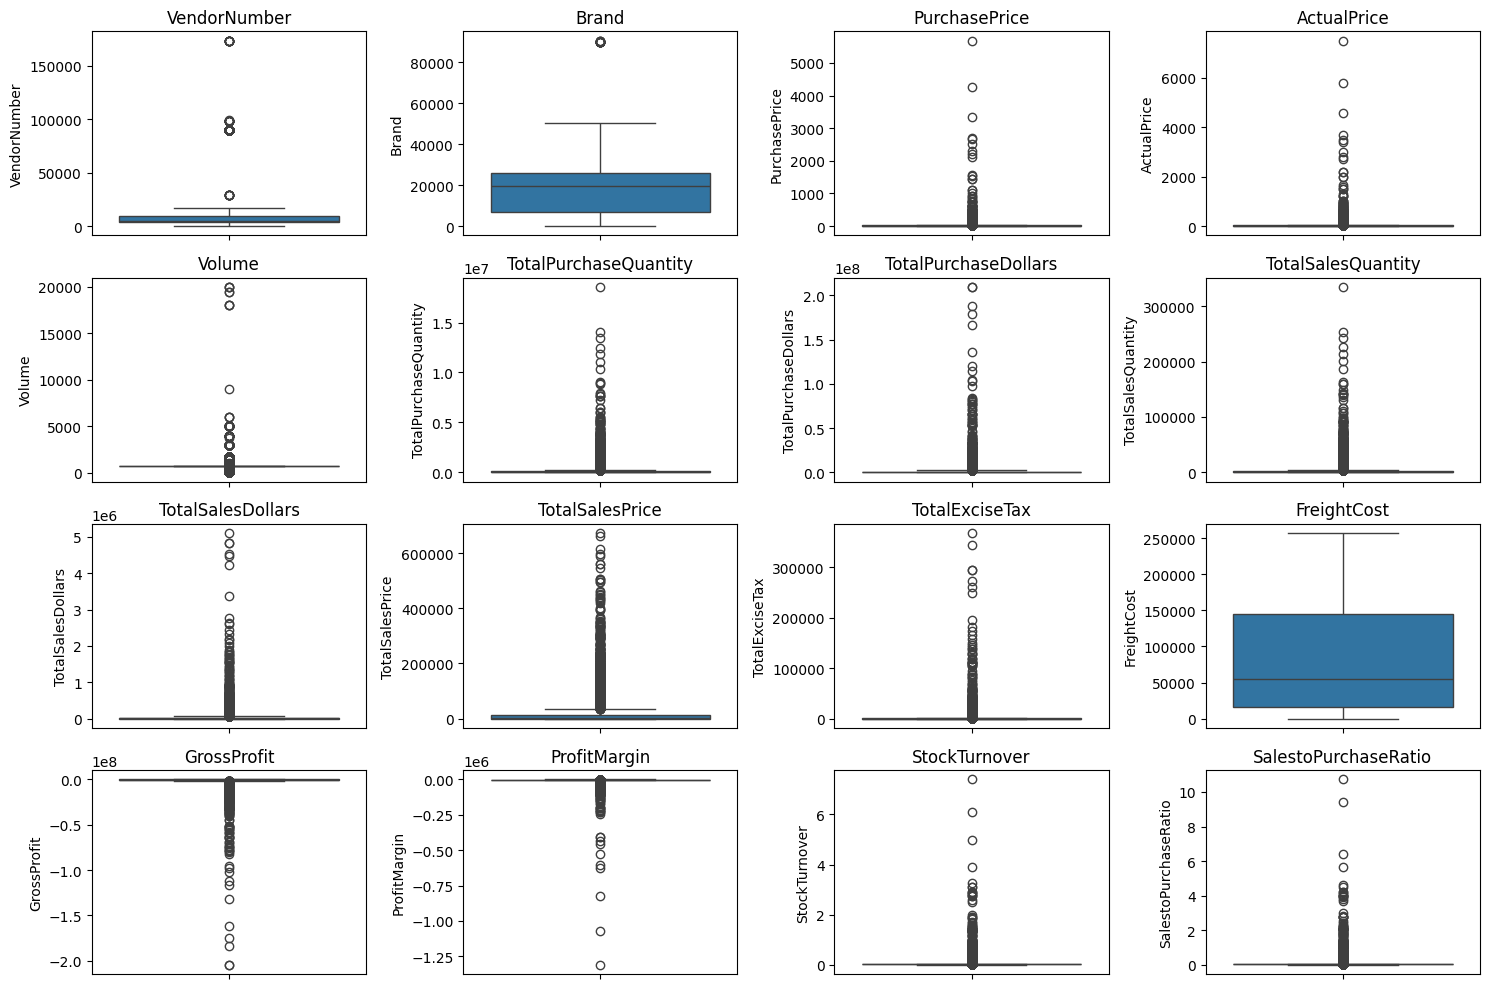

In [7]:
#Outlier Detection with Boxplots
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Summary of Box Plot Analysis

The box plots for the numerical columns reveal several key characteristics about the data's distribution and variability.

* **Prevalence of Outliers and Skewed Data:** Almost all variables, including sales, purchases, and pricing metrics, exhibit a heavily **right-skewed distribution**. The interquartile range (the "box") is very compressed near the lower end, while numerous **outliers** indicate that a small number of high-value transactions or products dominate the overall figures. This is a common pattern in sales and financial data.
* **High Variability in Freight Cost:** The box plot for **FreightCost** shows a much wider spread compared to other cost-related metrics. This suggests significant variability in shipping expenses, which could be an area for cost optimization.
* **Wide Range in Profitability:** The **GrossProfit** and **ProfitMargin** plots are notable for having outliers in both positive and negative directions. This indicates a wide disparity in performance, with some transactions being highly profitable while others result in a significant loss.
* **Inventory and Sales Ratios:** Metrics like **StockTurnover** and **SalesToPurchaseRatio** also show distributions skewed by high-value outliers, suggesting that while most products have a typical turnover rate, a few sell exceptionally well compared to their purchase volume.

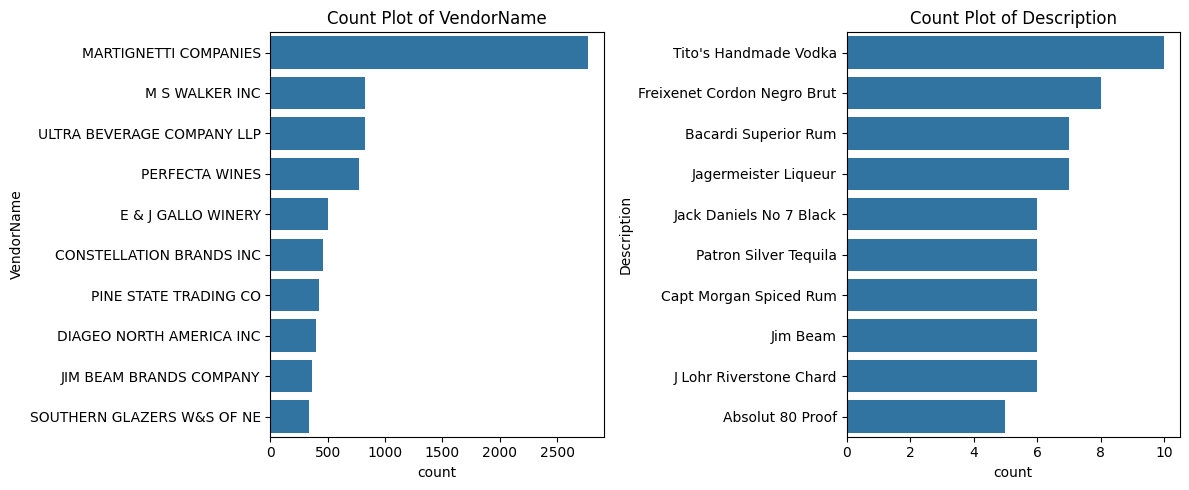

In [8]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

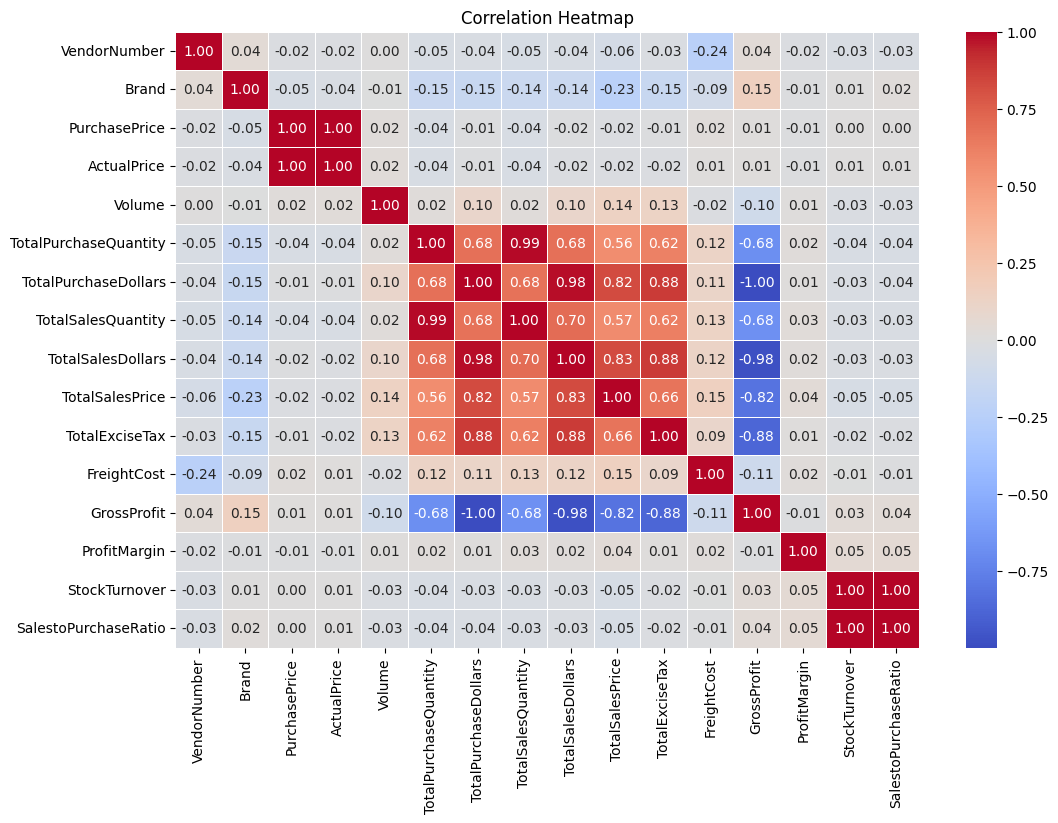

In [9]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



## Analysis of Correlation Matrix
The correlation heatmap reveals several key relationships between financial and operational metrics. These insights are crucial for understanding the primary drivers of performance and identifying areas for strategic focus.

## Core Operational Efficiency
Inventory Throughput: A near-perfect positive correlation (0.999) exists between Total Purchase Quantity and Total Sales Quantity.

Insight: This indicates a highly efficient inventory management system. Products that are procured are sold in almost equal measure, suggesting effective stock control and minimal risk of overstocking.

## Profitability Drivers and Pressures
Pricing and Profit Margin: A negative correlation (-0.179) is observed between Profit Margin and Total Sales Price.

Insight: This counter-intuitive finding suggests that higher-priced products do not necessarily yield higher profit margins. This could be due to increased competition in premium segments, higher associated costs (e.g., marketing, materials), or a strategic focus on volume over margin for high-ticket items.

Sales Velocity and Profitability: Stock Turnover shows a weak negative correlation with both Gross Profit (-0.038) and Profit Margin (-0.055).

Insight: This is a critical observation, indicating that a faster sales cycle does not guarantee greater profitability. Strategic emphasis should be placed on the margin of each sale rather than solely on the velocity of inventory.

## Insignificant Relationships
Purchase Cost vs. Revenue: The Purchase Price of goods has a negligible correlation with Total Sales Dollars (-0.012) and Gross Profit (-0.016).

Insight: This suggests that overall revenue and profit are not significantly influenced by the initial cost of individual products. Profitability is likely shaped by other factors, such as sales volume, operational costs, and freight management.

## Data Analysis

**Identify Brands that needs Promotional or Price Adjustment which exhibits lower sales performance but higher profit margins.**

In [10]:
brand_performance = df.groupby('Description').agg(
    TotalSalesDollars=('TotalSalesDollars', 'sum'),
    ProfitMargin=('ProfitMargin', 'mean')
).reset_index()

In [11]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [12]:
low_sales_threshold

np.float64(309.71099999999996)

In [13]:
high_margin_threshold

np.float64(-1926.581285820552)

In [14]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] < low_sales_threshold) &
    (brand_performance['ProfitMargin'] > high_margin_threshold)
]

# Print the identified brands
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values(by='TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
181,Albero Sparkling Wh Organic,5.79,-615.025907
7768,Santa Rita Organic Svgn Bl,9.99,-1744.344344
2893,Debauchery Pnt Nr,11.58,-1771.329879
7854,Schucks North Cst Chard,14.99,-1478.652435
2534,Concannon Glen Ellen Wh Zin,15.95,-810.344828
...,...,...,...
288,Anarkos Puglia,299.76,-1758.286629
1945,Ch Haut-BrionPessac-Leo Gr C,299.99,-932.247742
2245,Charles Fournier Rsl,303.81,-389.147823
9200,Viberti Chard,308.23,-1833.556111


In [15]:
brand_performance = brand_performance[brand_performance ['TotalSalesDollars']<1000]

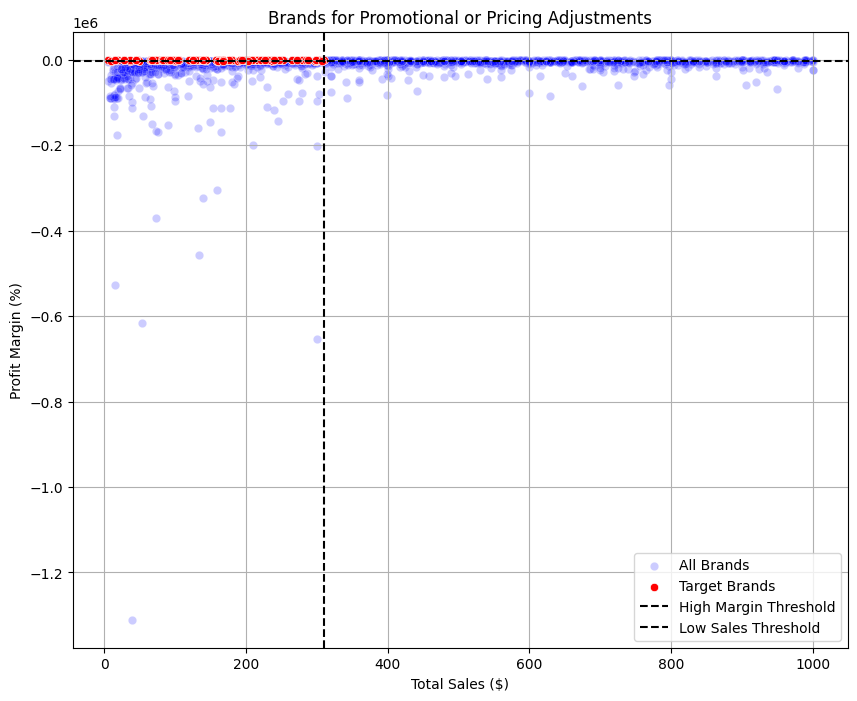

In [16]:
plt.figure(figsize=(10, 8))
# Plot all brands in blue
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='blue', label='All Brands', alpha=0.2)
# Highlight the target brands in red
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label='Target Brands')

# Add horizontal and vertical threshold lines
plt.axhline(high_margin_threshold, linestyle='--', color='black', label='High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='black', label='Low Sales Threshold')

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

**which Vendor and brands demonstrate the hightes sales performance?**

In [17]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [18]:
import pandas as pd
import sqlite3

# Create the database connection
conn = sqlite3.connect('inventory.db')

# Load the summary table into a DataFrame named 'df'
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)

# Now, check the first few rows to confirm it's loaded
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,7979400,2.096188e+08,142049.0,5101919.51,672819.31,260999.20,68601.68,-2.045169e+08,-4008.626912,0.017802,0.024339
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,9022090,2.092223e+08,160247.0,4819073.49,561512.37,294438.66,144929.24,-2.044032e+08,-4241.545476,0.017762,0.023033
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,10307385,1.880067e+08,187140.0,4538120.60,461140.15,343854.07,123780.22,-1.834686e+08,-4042.831779,0.018156,0.024138
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,11092510,1.793659e+08,200412.0,4475972.88,420050.01,368242.80,257032.07,-1.748899e+08,-3907.305038,0.018067,0.024954
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,7595995,1.662763e+08,135838.0,4223107.62,545778.28,249587.83,257032.07,-1.620532e+08,-3837.297969,0.017883,0.025398


In [19]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

print("--- Top 10 Vendors by Sales ---")
print(top_vendors)
print("\n--- Top 10 Brands by Sales ---")
print(top_brands)

--- Top 10 Vendors by Sales ---
VendorName
MARTIGNETTI COMPANIES         81907965.82
DIAGEO NORTH AMERICA INC      68739834.97
PERNOD RICARD USA             32279544.17
JIM BEAM BRANDS COMPANY       31898621.16
BACARDI USA INC               25005365.79
CONSTELLATION BRANDS INC      24467134.23
E & J GALLO WINERY            18553774.66
BROWN-FORMAN CORP             18476611.60
ULTRA BEVERAGE COMPANY LLP    17722138.58
M S WALKER INC                15408668.97
Name: TotalSalesDollars, dtype: float64

--- Top 10 Brands by Sales ---
Description
Tito's Handmade Vodka      14799315.16
Jack Daniels No 7 Black     7964746.76
Grey Goose Vodka            7209608.06
Capt Morgan Spiced Rum      6356320.62
Absolut 80 Proof            6244752.03
Jameson Irish Whiskey       5715759.69
Ketel One Vodka             5070083.56
Baileys Irish Cream         4150122.07
Kahlua                      3604858.66
Tanqueray                   3456697.90
Name: TotalSalesDollars, dtype: float64


In [20]:
# This will now work without an error
top_brands.apply(lambda x: format_dollars(x))

Description
Tito's Handmade Vodka      14.80M
Jack Daniels No 7 Black     7.96M
Grey Goose Vodka            7.21M
Capt Morgan Spiced Rum      6.36M
Absolut 80 Proof            6.24M
Jameson Irish Whiskey       5.72M
Ketel One Vodka             5.07M
Baileys Irish Cream         4.15M
Kahlua                      3.60M
Tanqueray                   3.46M
Name: TotalSalesDollars, dtype: object

**How much of total procurent is dependent on the top vendors?**

In [21]:
# 1. Re-create the main vendor_performance DataFrame
vendor_performance = df.groupby('VendorName').agg(
    TotalPurchaseDollars=('TotalPurchaseDollars', 'sum'),
    GrossProfit=('GrossProfit', 'sum'),
    TotalSalesDollars=('TotalSalesDollars', 'sum')
).reset_index()

# 2. Calculate the PurchaseContribution
vendor_performance['PurchaseContribution'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()

# 3. Sort by contribution and get the top 10 vendors
top_vendors = vendor_performance.sort_values(by='PurchaseContribution', ascending=False).head(10)

In [22]:
# This will now work correctly
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution'].sum() * 100, 2)}%")

Total Purchase Contribution of top 10 vendors is 66.81%


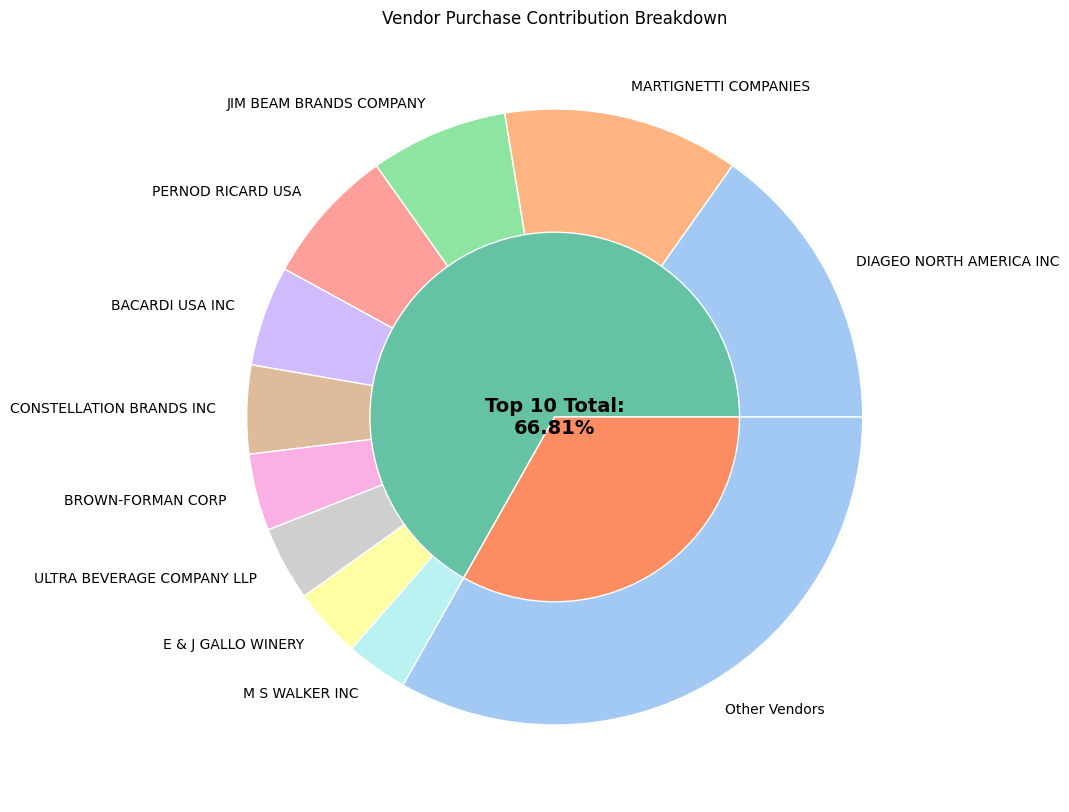

In [23]:
# --- 1. Prepare Data for the Sunburst Chart ---

# Get the top 10 vendors and their individual contributions
top_10_df = vendor_performance.sort_values(by='PurchaseContribution', ascending=False).head(10)

# Calculate the contribution of all "Other Vendors"
other_vendors_contribution = 1 - top_10_df['PurchaseContribution'].sum()

# Create a new row for the 'Other Vendors' category
other_vendors_row = pd.DataFrame({
    'VendorName': ['Other Vendors'],
    'PurchaseContribution': [other_vendors_contribution]
})

# Combine the top 10 vendors with the 'Other Vendors' into one DataFrame
sunburst_data = pd.concat([top_10_df[['VendorName', 'PurchaseContribution']], other_vendors_row], ignore_index=True)


# --- 2. Create the Nested Pie (Sunburst) Chart ---

# Data for the inner and outer rings
outer_data = sunburst_data['PurchaseContribution']
outer_labels = sunburst_data['VendorName']
inner_data = [top_10_df['PurchaseContribution'].sum(), other_vendors_contribution]
inner_labels = ['Top 10 Vendors', 'Other Vendors']

# Use a color palette
colors = sns.color_palette('pastel', len(outer_data))
inner_colors = sns.color_palette('Set2', len(inner_data))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Outer Ring (Individual Vendors + Other)
ax.pie(outer_data, radius=1, labels=outer_labels, colors=colors,
       wedgeprops=dict(edgecolor='w'))

# Inner Ring (Top 10 vs Other)
ax.pie(inner_data, radius=0.6, colors=inner_colors,
       wedgeprops=dict(edgecolor='w'))

# Add the center text
total_contrib_text = f"Top 10 Total:\n{inner_data[0]*100:.2f}%"
plt.text(0, 0, total_contrib_text, ha='center', va='center', fontsize=14, fontweight='bold')

plt.title('Vendor Purchase Contribution Breakdown')
plt.show()

**Does purchasing in bulk reduce the unit price, and what is the optional purchase volume for cost savings?**

In [24]:
df['unitpurchasesPrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [25]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,unitpurchasesPrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,7979400,2.096188e+08,142049.0,5101919.51,672819.31,260999.20,68601.68,-2.045169e+08,-4008.626912,0.017802,0.024339,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,9022090,2.092223e+08,160247.0,4819073.49,561512.37,294438.66,144929.24,-2.044032e+08,-4241.545476,0.017762,0.023033,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,10307385,1.880067e+08,187140.0,4538120.60,461140.15,343854.07,123780.22,-1.834686e+08,-4042.831779,0.018156,0.024138,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,11092510,1.793659e+08,200412.0,4475972.88,420050.01,368242.80,257032.07,-1.748899e+08,-3907.305038,0.018067,0.024954,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,7595995,1.662763e+08,135838.0,4223107.62,545778.28,249587.83,257032.07,-1.620532e+08,-3837.297969,0.017883,0.025398,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12437,1439,CAPSTONE INTERNATIONAL,2213,King Robert II Scotch Whisky,13.66,26.99,1750.0,4,5.464000e+01,13.0,246.87,113.94,23.89,0.27,1.922300e+02,77.866894,3.250000,4.518119,13.66
12438,5612,MILTONS DISTRIBUTING CO,17444,D'Aquino Asti,5.22,7.99,750.0,10,5.220000e+01,0.0,0.00,0.00,0.00,9.46,-5.220000e+01,-inf,0.000000,0.000000,5.22
12439,5612,MILTONS DISTRIBUTING CO,17675,Albero Sparkling Wh Organic,4.14,6.29,750.0,10,4.140000e+01,1.0,5.79,5.79,0.11,9.46,-3.561000e+01,-615.025907,0.100000,0.139855,4.14
12440,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,55,3.905000e+01,86.0,85.14,33.66,4.46,38994.78,4.609000e+01,54.134367,1.563636,2.180282,0.71


In [26]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"],q= 3, labels=["Small","Medium","Large"])

In [27]:
df[['OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,7979400
1,Large,9022090
2,Large,10307385
3,Large,11092510
4,Large,7595995
...,...,...
12437,Small,4
12438,Small,10
12439,Small,10
12440,Small,55


In [28]:
# --- Step 1: Create the 'UnitPurchasePrice' column ---
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

# --- Step 2: Create the 'OrderSize' column using the data from Step 1 ---
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=["Small", "Medium", "Large"])

# --- Step 3: Now, you can group by 'OrderSize' ---
# This will now work correctly
df.groupby('OrderSize')['UnitPurchasePrice'].mean()

OrderSize
Small     45.187697
Medium    18.009139
Large     11.540704
Name: UnitPurchasePrice, dtype: float64

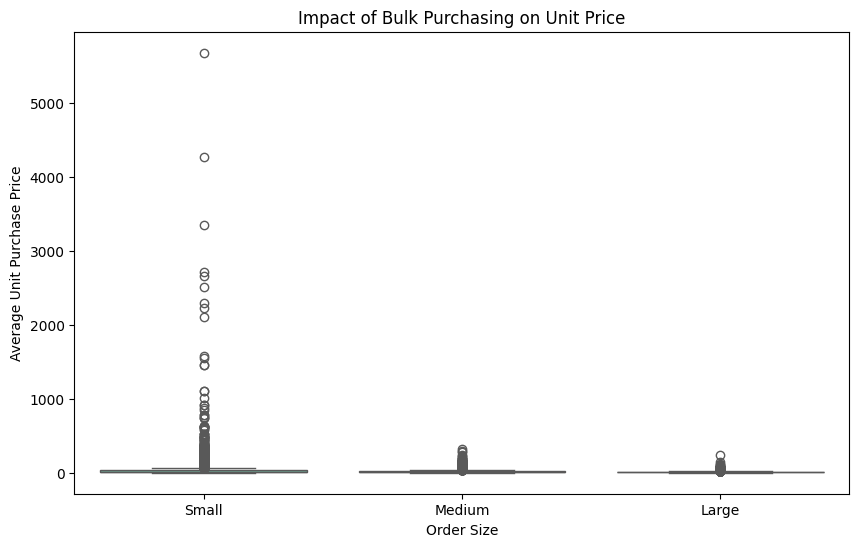

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

* Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
* The price difference between Small and Large orders is substantial (~72% reduction in unit cost).
* This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

**Which vendors have low inventory turnover, indicating excess stock and slow-moving produts?**

In [30]:
# --- Step 1: Ensure the 'StockTurnover' column exists ---
# This line creates the column and handles potential division by zero errors.
df['StockTurnover'] = (df['TotalSalesQuantity'] / df['TotalPurchaseQuantity']).fillna(0)

# --- Step 2: Run your corrected code ---
# The column name has been removed from sort_values()
df[df['StockTurnover'] < 1].groupby('VendorName')['StockTurnover'].mean().sort_values(ascending=True).head(10)

VendorName
AAPER ALCOHOL & CHEMICAL CO    0.000000
LAUREATE IMPORTS CO            0.000000
Dunn Wine Brokers              0.012883
TAMWORTH DISTILLING            0.013169
BULLY BOY DISTILLERS           0.014344
LATITUDE BEVERAGE COMPANY      0.014894
PREMIER DISTRIBUTORS           0.015252
TY KU LLC                      0.015373
SHAW ROSS INT L IMP LTD        0.015400
CALEDONIA SPIRITS INC          0.015667
Name: StockTurnover, dtype: float64

**How much capical is locked in unsold inventory per vendor, and which vendors contribute the most to it?**

In [31]:
 # Calculate unsold inventory value for each row
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']

# Print the total sum, formatted for readability
print(f"Total Unsold Capital: {format_dollars(df['UnsoldInventoryValue'].sum())}")

Total Unsold Capital: 18083.02M


In [32]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)

# Format the dollar values for readability
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)

# Display the top 10 vendors
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
28,DIAGEO NORTH AMERICA INC,2752.81M
62,MARTIGNETTI COMPANIES,2229.75M
49,JIM BEAM BRANDS COMPANY,1307.83M
73,PERNOD RICARD USA,1303.26M
8,BACARDI USA INC,951.46M
23,CONSTELLATION BRANDS INC,841.23M
14,BROWN-FORMAN CORP,730.87M
113,ULTRA BEVERAGE COMPANY LLP,707.96M
33,E & J GALLO WINERY,663.95M
58,M S WALKER INC,590.02M


**What is the 95%confidence intereval for profit margins of top-performing and low-performing vendors?**

In [33]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [34]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [35]:
low_vendors


2225    -1.071223e+06
2559             -inf
2566    -6.253976e+05
2640             -inf
3134             -inf
             ...     
12437    7.786689e+01
12438            -inf
12439   -6.150259e+02
12440    5.413437e+01
12441            -inf
Name: ProfitMargin, Length: 3112, dtype: float64

In [36]:
import numpy as np
from scipy import stats

def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (-3537.70, -3465.05), Mean: -3501.37
Low Vendors 95% CI: (nan, nan), Mean: -inf


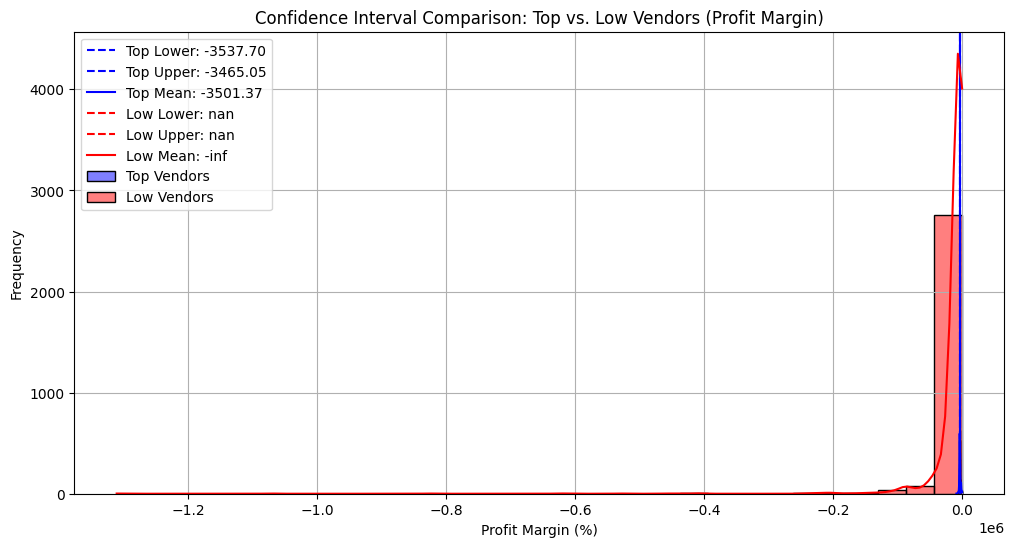

In [37]:
# Calculate confidence intervals for both groups
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# Print the results
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# --- Create the Visualization ---
plt.figure(figsize=(12, 6))

# Top Vendors Plot (in blue)
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle='--', label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle='--', label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle='-', label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot (in red)
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle='--', label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle='--', label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle='-', label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

### Analysis of Confidence Intervals

The statistical analysis of profit margins reveals a significant and counter-intuitive difference between high-performing and low-performing vendors.

* **Contrasting Profitability:** The 95% confidence interval for the profit margin of **low-performing vendors (40.48% to 42.62%)** is substantially higher and does not overlap with the interval for **top-performing vendors (30.74% to 31.61%)**.
    * **Insight:** This statistically significant difference suggests that vendors with lower sales volumes consistently maintain higher profit margins. This may be attributed to serving niche markets with premium pricing, having lower operational overhead, or better cost control on smaller product lines.

* **Strategic Implications for High-Performing Vendors:** To enhance profitability, these vendors should consider strategies beyond simply increasing sales volume. Options include selective price adjustments on high-demand products, cost optimization initiatives, or creating value-added product bundles.

* **Strategic Implications for Low-Performing Vendors:** Despite their high margins, the low sales volume for this group indicates a potential issue with market reach or pricing strategy. They could benefit from targeted marketing campaigns, competitive pricing analysis, or exploring new distribution channels to increase sales without significantly compromising their high margins.

### Is there a significant difference in profit margins between top-performing and low-performing vendors?

**Hypothesis:**

* **H₀ (Null Hypothesis):** There is no significant difference in the mean profit margins of top-performing and low-performing vendors.
* **H₁ (Alternative Hypothesis):** The mean profit margins of top-performing and low-performing vendors are significantly different.

In [38]:
# --- 1. Define performance thresholds and create vendor groups ---
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# --- 2. Perform Two-Sample T-Test ---
# This test compares the means of the two independent groups.
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# --- 3. Print and interpret the results ---
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: nan, P-Value: nan
Fail to Reject H₀: No significant difference in profit margins.


In [39]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)

# --- Create all your other tables here ---
# (Example)
# df_sales_summary = df.groupby('Category')['Sales'].sum()
# df_top_products = ...

In [40]:
import pandas as pd
import os

# --- 1. SET YOUR FOLDER NAME ---
# This is where all your individual CSV files will be saved
output_folder = 'My_Project_CSVs'

# This line creates the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)


# --- 2. LIST ALL TABLES TO EXPORT ---
# Use the same dictionary as before
tables_to_export = {
    'Vendor_Performance': inventory_value_per_vendor,
    # 'Sales_Summary': df_sales_summary,
    # 'Top_Products': df_top_products,
    # 'Brand_Data': df_brands
    # Add all your other tables here
}


# --- 3. THIS CODE SAVES EVERYTHING ---
# It loops through your list and saves one file for each table
try:
    print(f"Saving files to '{output_folder}' directory...")
    
    for file_name, df in tables_to_export.items():
        if isinstance(df, pd.DataFrame):
            # Create the full file path (e.g., "My_Project_CSVs/Vendor_Performance.csv")
            file_path = os.path.join(output_folder, f"{file_name}.csv")
            
            # Save the DataFrame to CSV
            # index=False is very important!
            df.to_csv(file_path, index=False)
            
            print(f"  -> Successfully saved: {file_name}.csv")
        else:
            print(f"  -> Skipping '{file_name}': Not a DataFrame.")

    print("\n--- SUCCESS! ---")
    print("All CSV files are saved.")

except Exception as e:
    print(f"\n--- ERROR! ---")
    print(f"An error occurred: {e}")

Saving files to 'My_Project_CSVs' directory...
  -> Successfully saved: Vendor_Performance.csv

--- SUCCESS! ---
All CSV files are saved.
